In [2]:
!pip install pandas 

In [30]:
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import statsmodels.api as sm
import seaborn as sns  


In [34]:
df_Auto = pd.read_csv("/Users/bayowaonabajo/Downloads/Auto.csv")

In [36]:
# drop missing values
df_Auto["horsepower"] = pd.to_numeric(df_Auto["horsepower"], errors="coerce")
df_Auto = df_Auto.dropna(subset=["horsepower"])

In [38]:
df_Auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [44]:
#8a - c
# Define predictor and response
X = df_Auto["horsepower"]
y = df_Auto["mpg"]

# Add constant for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           7.03e-81
Time:                        17:23:29   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0



R squared(0.606) means that 60.6 percent of the variance in mpg is explained by horsepower. This indicates a moderately strong relationship.
Adusted R-squared(0.605) is adjusted for the number of predictors, it is very close to R squared, meaning adding more variables would not significantly change the model.

Intercept (39.94): Means when horsepower is 0, the predicted mpg is 39.94.

Horsepower (-0.1578): For each additional unit of horsepower, the mpg decreases by 0.1578.Since this coefficient is negative, the relationship is inverse implying that higher horsepower leads to lower fuel efficiency.

P-values (< 0.05): Both coefficients are highly significant and is strong evidence that horsepower affects mpg.

Predicted mpg for Horsepower = 98

So, for a car with 98 horsepower, the predicted fuel efficiency is 24.47 mpg.

In [50]:
import numpy as np
import pandas as pd

# Create new observation with horsepower = 98, including intercept term
X_new = pd.DataFrame({"const": [1], "horsepower": [98]})

# Get predictions
prediction = model.get_prediction(X_new)

# Print confidence and prediction intervals
print(prediction.summary_frame(alpha=0.05))



        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


Interpretation: 
A car with 98 horsepower is expected to have 24.47 mpg on average as Predicted mpg.

The mean mpg for cars with 98 horsepower is most likely between 23.97 and 24.96.

Cars with 98 horsepower, should have mpg anywhere between 14.81 and 34.12.

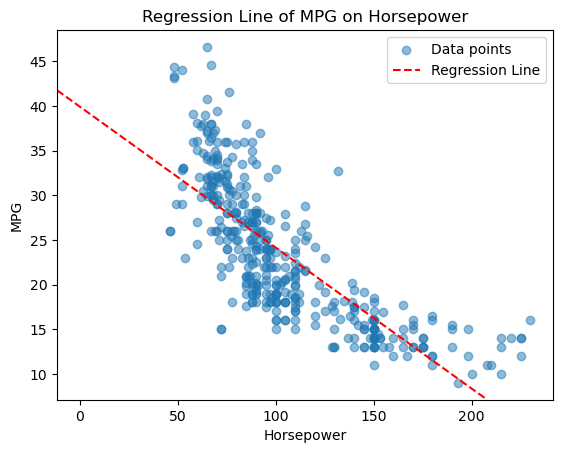

In [54]:
import matplotlib.pyplot as plt

# scatter plot
fig, ax = plt.subplots()
ax.scatter(df_Auto["horsepower"], df_Auto["mpg"], alpha=0.5, label="Data points")

# regression line using ax.axline()
slope = model.params["horsepower"]
intercept = model.params["const"]
ax.axline((0, intercept), slope=slope, color='red', linestyle='--', label="Regression Line")

# Labels, title
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
ax.set_title("Regression Line of MPG on Horsepower")
ax.legend()
plt.show()


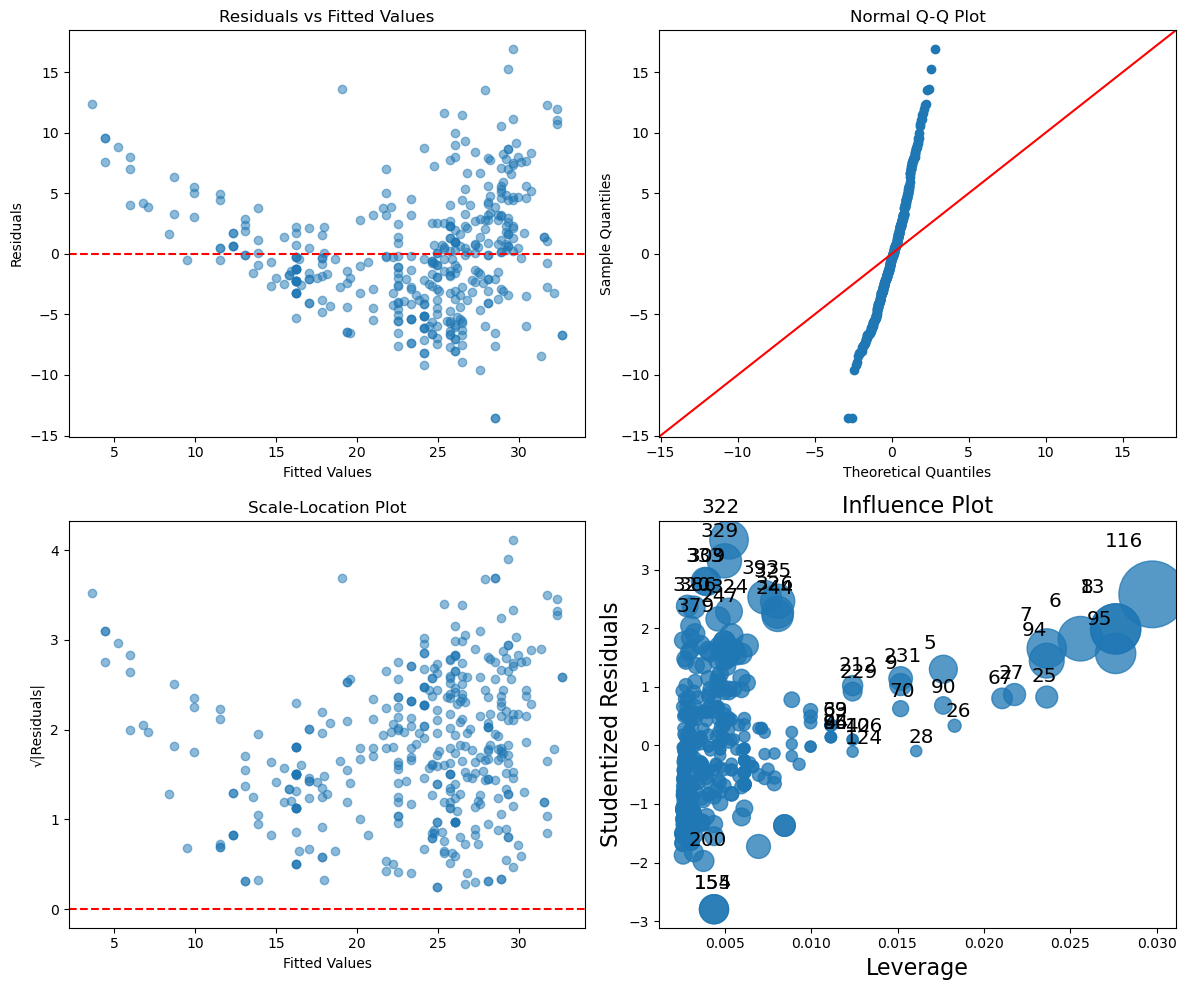

In [84]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Get residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

## 1. Residuals vs Fitted Values Plot
axes[0, 0].scatter(fitted_values, residuals, alpha=0.5)
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_xlabel("Fitted Values")
axes[0, 0].set_ylabel("Residuals")
axes[0, 0].set_title("Residuals vs Fitted Values")

## 2. Normal Q-Q Plot
sm.qqplot(residuals, line='45', ax=axes[0, 1])
axes[0, 1].set_title("Normal Q-Q Plot")

## 3. Scale-Location Plot
axes[1, 0].scatter(fitted_values, np.sqrt(np.abs(residuals)), alpha=0.5)
axes[1, 0].axhline(0, color='red', linestyle='--')
axes[1, 0].set_xlabel("Fitted Values")
axes[1, 0].set_ylabel("√|Residuals|")
axes[1, 0].set_title("Scale-Location Plot")

## 4. Residuals vs Leverage Plot
sm.graphics.influence_plot(model, ax=axes[1, 1], criterion="cooks")

# Display plots
plt.tight_layout()
plt.show()


Residuals plot shows a pattern meaning the relationship between the predictor (horsepower) and response (mpg) may not be purely linear.
The Scale Location Plot suggests non constant variance of residuals,showing no homoscedasticity.
The Normal Q Q Plot shows deviations from normality, indicating that the residuals are not normally distributed.
The Influence Plot identifies potential outliers that may distort the regression results.


!git init


In [4]:
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/Bayowar/ML_tasks.git

On branch main
Your branch is ahead of 'upstream/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   researchpaperdata2_0_0.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.CFUserTextEncoding
	.DS_Store
	.Rapp.history
	.Renviron
	.Renviron_backup
	.Xauthority
	.anaconda/
	.azure/
	.bash_history
	.bash_profile
	.cache/
	.conda/
	.condarc
	.config/
	.continuum/
	.gitconfig
	.gitignore
	.idlerc/
	.ipynb_checkpoints/
	.ipython/
	.jupyter/
	.keras/
	.lesshst
	.local/
	.matplotlib/
	.mysql_history
	.ssh/
	.tcshrc
	.viminfo
	.virtual_documents/
	.xonshrc
	.zprofile
	.zsh_history
	.zsh_sessions/
	.zshrc
	Bayowa_hw2.txt
	Bayowa_hw2/
	Bayowa_hw3 (1).ipynb
	Bayowa_hw4/
	Data200exercise1
	Desktop/
	Downloads/
	EnvironmentSetupData/
	Exer1.ipynb
	Kaggle archive NigHe

In [6]:
!git add Exer1.ipynb

In [8]:
!git commit -m "first commit"

[main 865041e] first commit
 1 file changed, 355 insertions(+)
 create mode 100644 Exer1.ipynb


In [10]:
!git push -u origin main

fatal: 'git@github.com/Bayowar/EnvironmentSetupData' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [12]:
!git remote add origin https://github.com/Bayowar/ML_tasks.git

error: remote origin already exists.


In [16]:
!git push -u origin https://github.com/Bayowar/ML_tasks.git 

fatal: invalid refspec 'https://github.com/Bayowar/ML_tasks.git'
